In [93]:
#Импорт sklearn
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
#Импорт numpy и pandas

import numpy as np
import pandas as pd
from pandas import read_excel, DataFrame, Series
from numpy.random import seed


#Импорт matplotlib
import matplotlib.pyplot as plt


#Импорт seaborn
import seaborn as sb

#Импорт plotly
import plotly.express as px



#Импорт joblib
from joblib import dump, load

#Импорт scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [94]:
DataF1 = pd.read_excel('C:/ESD/X_clean.xlsx')#Загрузка чистого датасета
DataF1.drop(['Unnamed: 0'], axis=1, inplace=True)#Удаление столбца
DataF1.shape#Проверка размерности

(922, 13)

In [95]:
DataF1.corr()#Поиск кореляции

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.007996   
модуль упругости, ГПа                                        0.051643   
Количество отвердителя, м.%                                  0.001353   
Содержание эпоксидных групп,%_2                              0.021982   
Температура вспышки, С_2                                    -0.010565   
Поверхностная плотность, г/м2                                0.011910   
Модуль упругости при растяжении, ГПа                        -0.024316   
Прочность при растяжении, МПа                                0.019141   
Потребление смолы, г/м2                                      0.076857   
Угол нашивки, град                                          -0.032144   
Шаг нашивки                                                  0.039924   
Плотность нашивки                                            0.047835   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.007996               0.051643   
Плотность, кг/м3                              1.000000              -0.001416   
модуль упругости, ГПа                        -0.001416               1.000000   
Количество отвердителя, м.%                  -0.048938               0.044550   
Содержание эпоксидных групп,%_2               0.004568              -0.001442   
Температура вспышки, С_2                     -0.021256               0.037622   
Поверхностная плотность, г/м2                 0.061496              -0.007805   
Модуль упругости при растяжении, ГПа         -0.015597               0.020063   
Прочность при растяжении, МПа                -0.079188               0.031041   
Потребление смолы, г/м2                      -0.009609               0.008368   
Угол нашивки, град                           -0.052993              -0.031490   
Шаг нашивки                                  -0.048648               0.010238   
Плотность нашивки                             0.086460               0.078810   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001353   
Плотность, кг/м3                                        -0.048938   
модуль упругости, ГПа                                    0.044550   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.011429   
Температура вспышки, С_2                                 0.070623   
Поверхностная плотность, г/м2                            0.038762   
Модуль упругости при растяжении, ГПа                    -0.057026   
Прочность при растяжении, МПа                           -0.065711   
Потребление смолы, г/м2                                 -0.014827   
Угол нашивки, град                                       0.034103   
Шаг нашивки                                             -0.017394   
Плотность нашивки                                        0.007981   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.021982   
Плотность, кг/м3                                             0.004568   
модуль упругости, ГПа                                       -0.001442   
Количество отвердителя, м.%                                  0.011429   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.025315   
Поверхностная плотность, г/м2                               -0.015844   
Модуль упругости при растяжении, ГПа                         0.053887   
Прочность при растяжении, МПа                               -0.013099   
Потребление смолы, г/м2                                      0.010808   
Угол нашивки, град                                           0.034520   
Шаг нашивки                          

In [96]:
result = DataF1.describe()
result.T

count         mean         std  \
Соотношение матрица-наполнитель       922.0     2.927964    0.895472   
Плотность, кг/м3                      922.0  1974.118744   71.040648   
модуль упругости, ГПа                 922.0   736.119982  327.607008   
Количество отвердителя, м.%           922.0   111.136066   26.753228   
Содержание эпоксидных групп,%_2       922.0    22.200570    2.393926   
Температура вспышки, С_2              922.0   286.181128   39.420764   
Поверхностная плотность, г/м2         922.0   482.429070  280.437329   
Модуль упругости при растяжении, ГПа  922.0    73.303464    3.025864   
Прочность при растяжении, МПа         922.0  2461.491315  453.564734   
Потребление смолы, г/м2               922.0   218.048059   57.137475   
Угол нашивки, град                    922.0     0.510846    0.500154   
Шаг нашивки                           922.0     6.931939    2.514184   
Плотность нашивки                     922.0    57.562887   11.122204   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.547391     2.320191     2.907832   
Плотность, кг/м3                      1784.482245  1923.318006  1977.321002   
модуль упругости, ГПа                    2.436909   498.538615   736.178435   
Количество отвердителя, м.%             38.668500    92.856591   111.162090   
Содержание эпоксидных групп,%_2         15.695894    20.556328    22.177681   
Температура вспышки, С_2               179.374391   259.205321   286.220763   
Поверхностная плотность, г/м2            0.603740   264.345872   457.732246   
Модуль упругости при растяжении, ГПа    65.793845    71.241213    73.247594   
Прочность при растяжении, МПа         1250.392802  2148.175736  2455.974462   
Потребление смолы, г/м2                 72.530873   179.875097   218.697660   
Угол нашивки, град                       0.000000     0.000000     1.000000   
Шаг нашивки                              0.037639     5.143644     6.972862   
Плотность нашивки                       28.661632    50.275385    57.584225   

                                              75%          max  
Соотношение матрица-наполнитель          3.549367     5.314144  
Плотность, кг/м3                      2020.053266  2161.565216  
модуль упругости, ГПа                  956.955626  1628.000000  
Количество отвердителя, м.%            130.109815   181.828448  
Содержание эпоксидных групп,%_2         23.956980    28.955094  
Температура вспышки, С_2               313.012786   386.067992  
Поверхностная плотность, г/м2          695.531920  1291.340115  
Модуль упругости при растяжении, ГПа    75.310130    81.203147  
Прочность при растяжении, МПа         2751.233766  3654.434359  
Потребление смолы, г/м2                256.623860   359.052220  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.612094    13.732404  
Плотность нашивки                       64.840898    86.012427

In [97]:
# Нормализация данных

In [98]:
#Копирование датасета.
DataF1_norm = DataF1.copy()

<AxesSubplot:ylabel='Density'>

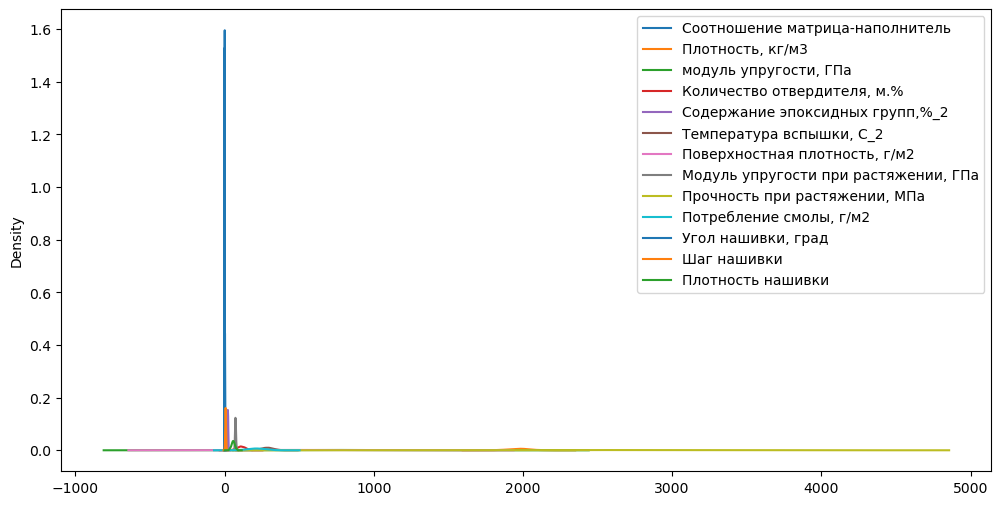

In [99]:
#Оценка плотности
fig, ax = plt.subplots(figsize = (12, 6))
DataF1_norm.plot(kind = 'kde', ax = ax)

In [100]:
#Нормализация MinMaxScaler() 
scaler = preprocessing.MinMaxScaler()
col = DataF1_norm.columns
result = scaler.fit_transform(DataF1_norm)
minmax = pd.DataFrame(result, columns = col)
minmax.describe()


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.499412          0.502904   
std                           0.187858          0.188395   
min                           0.000000          0.000000   
25%                           0.371909          0.368184   
50%                           0.495189          0.511396   
75%                           0.629774          0.624719   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.451341                     0.506200   
std                 0.201534                     0.186876   
min                 0.000000                     0.000000   
25%                 0.305188                     0.378514   
50%                 0.451377                     0.506382   
75%                 0.587193                     0.638735   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                          0.490578                  0.516739   
std                           0.180548                  0.190721   
min                           0.000000                  0.000000   
25%                           0.366571                  0.386228   
50%                           0.488852                  0.516931   
75%                           0.623046                  0.646553   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                        0.373295                              0.487343   
std                         0.217269                              0.196366   
min                         0.000000                              0.000000   
25%                         0.204335                              0.353512   
50%                         0.354161                              0.483718   
75%                         0.538397                              0.617568   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     922.000000               922.000000   
mean                        0.503776                 0.507876   
std                         0.188668                 0.199418   
min                         0.000000                 0.000000   
25%                         0.373447                 0.374647   
50%                         0.501481                 0.510143   
75%                         0.624299                 0.642511   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          922.000000   922.000000         922.000000  
mean             0.510846     0.503426           0.503938  
std              0.500154     0.183587           0.193933  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372844           0.376869  
50%              1.000000     0.506414           0.504310  
75%              1.000000     0.626112           0.630842  
max              1.000000     1.000000           1.000000

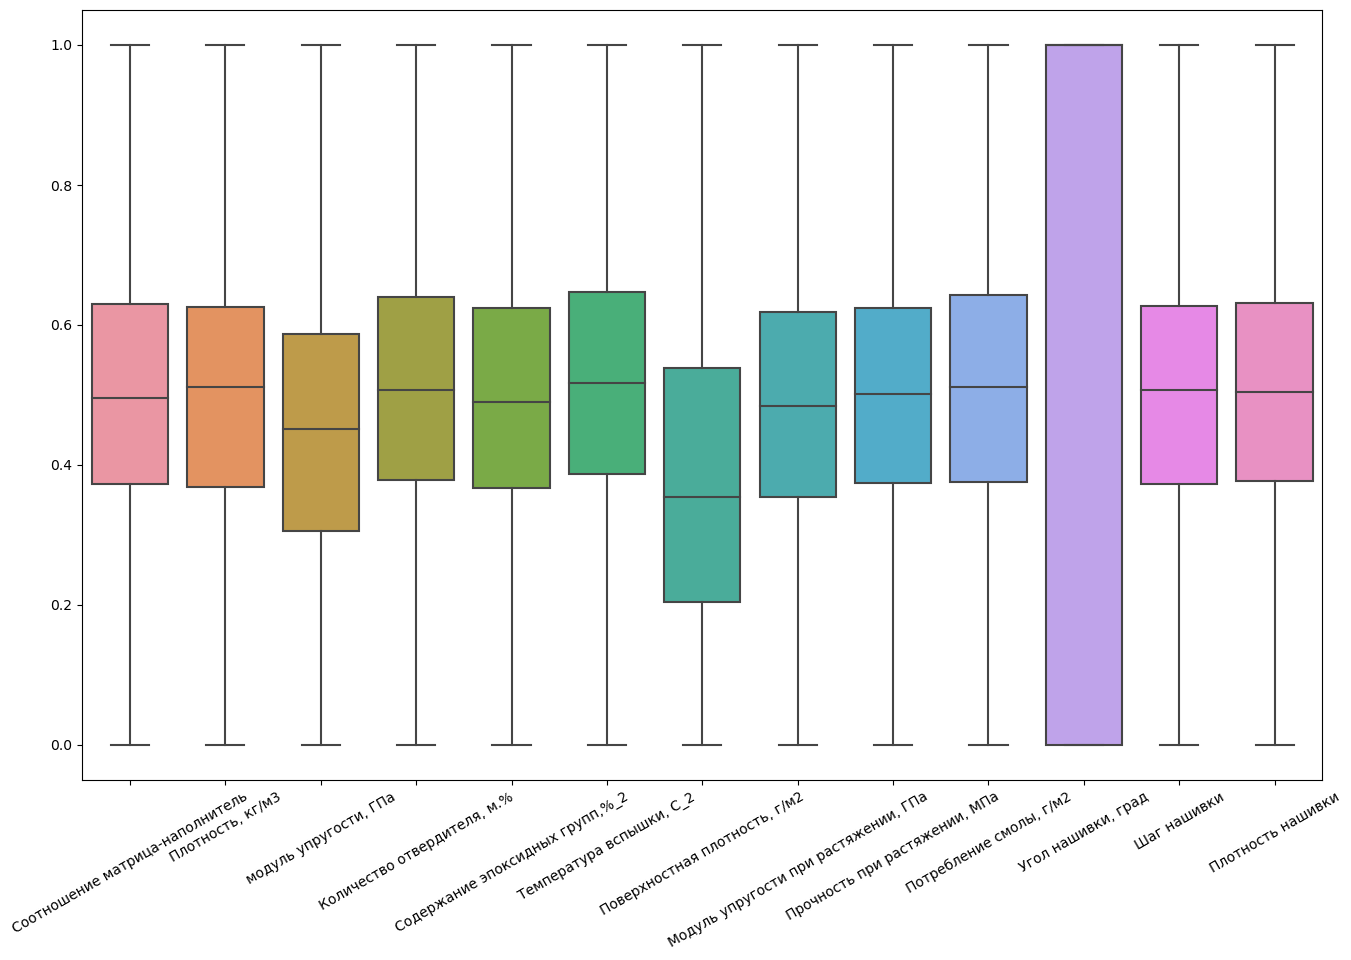

In [101]:
#отображает распределения minmax
plt.figure(figsize = (16,10))
ax = sb.boxplot(data = minmax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

<AxesSubplot:ylabel='Density'>

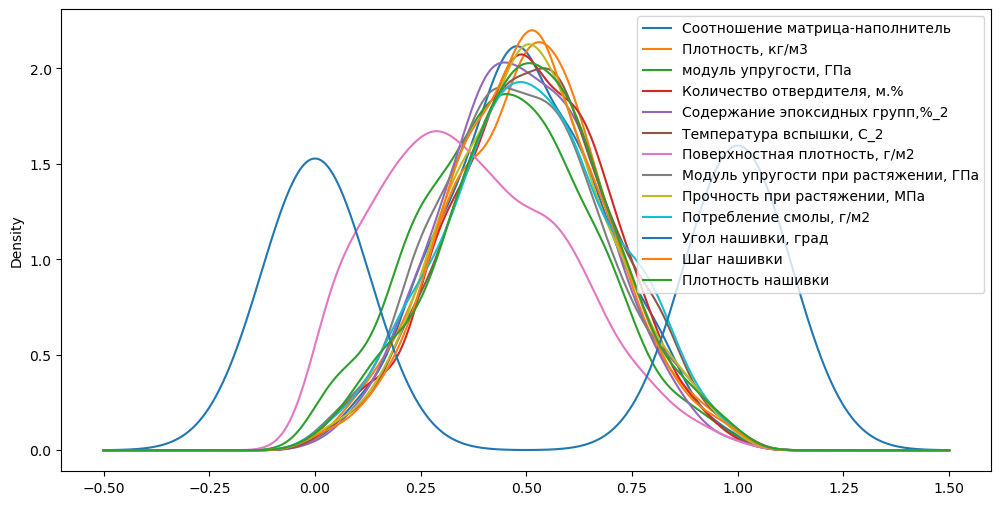

In [102]:
#график плотности распределения
fig, ax = plt.subplots(figsize = (12, 6))
minmax.plot(kind = 'kde', ax = ax)

In [103]:
#матрица рассеяния (pairplot) до датафрейму minmax

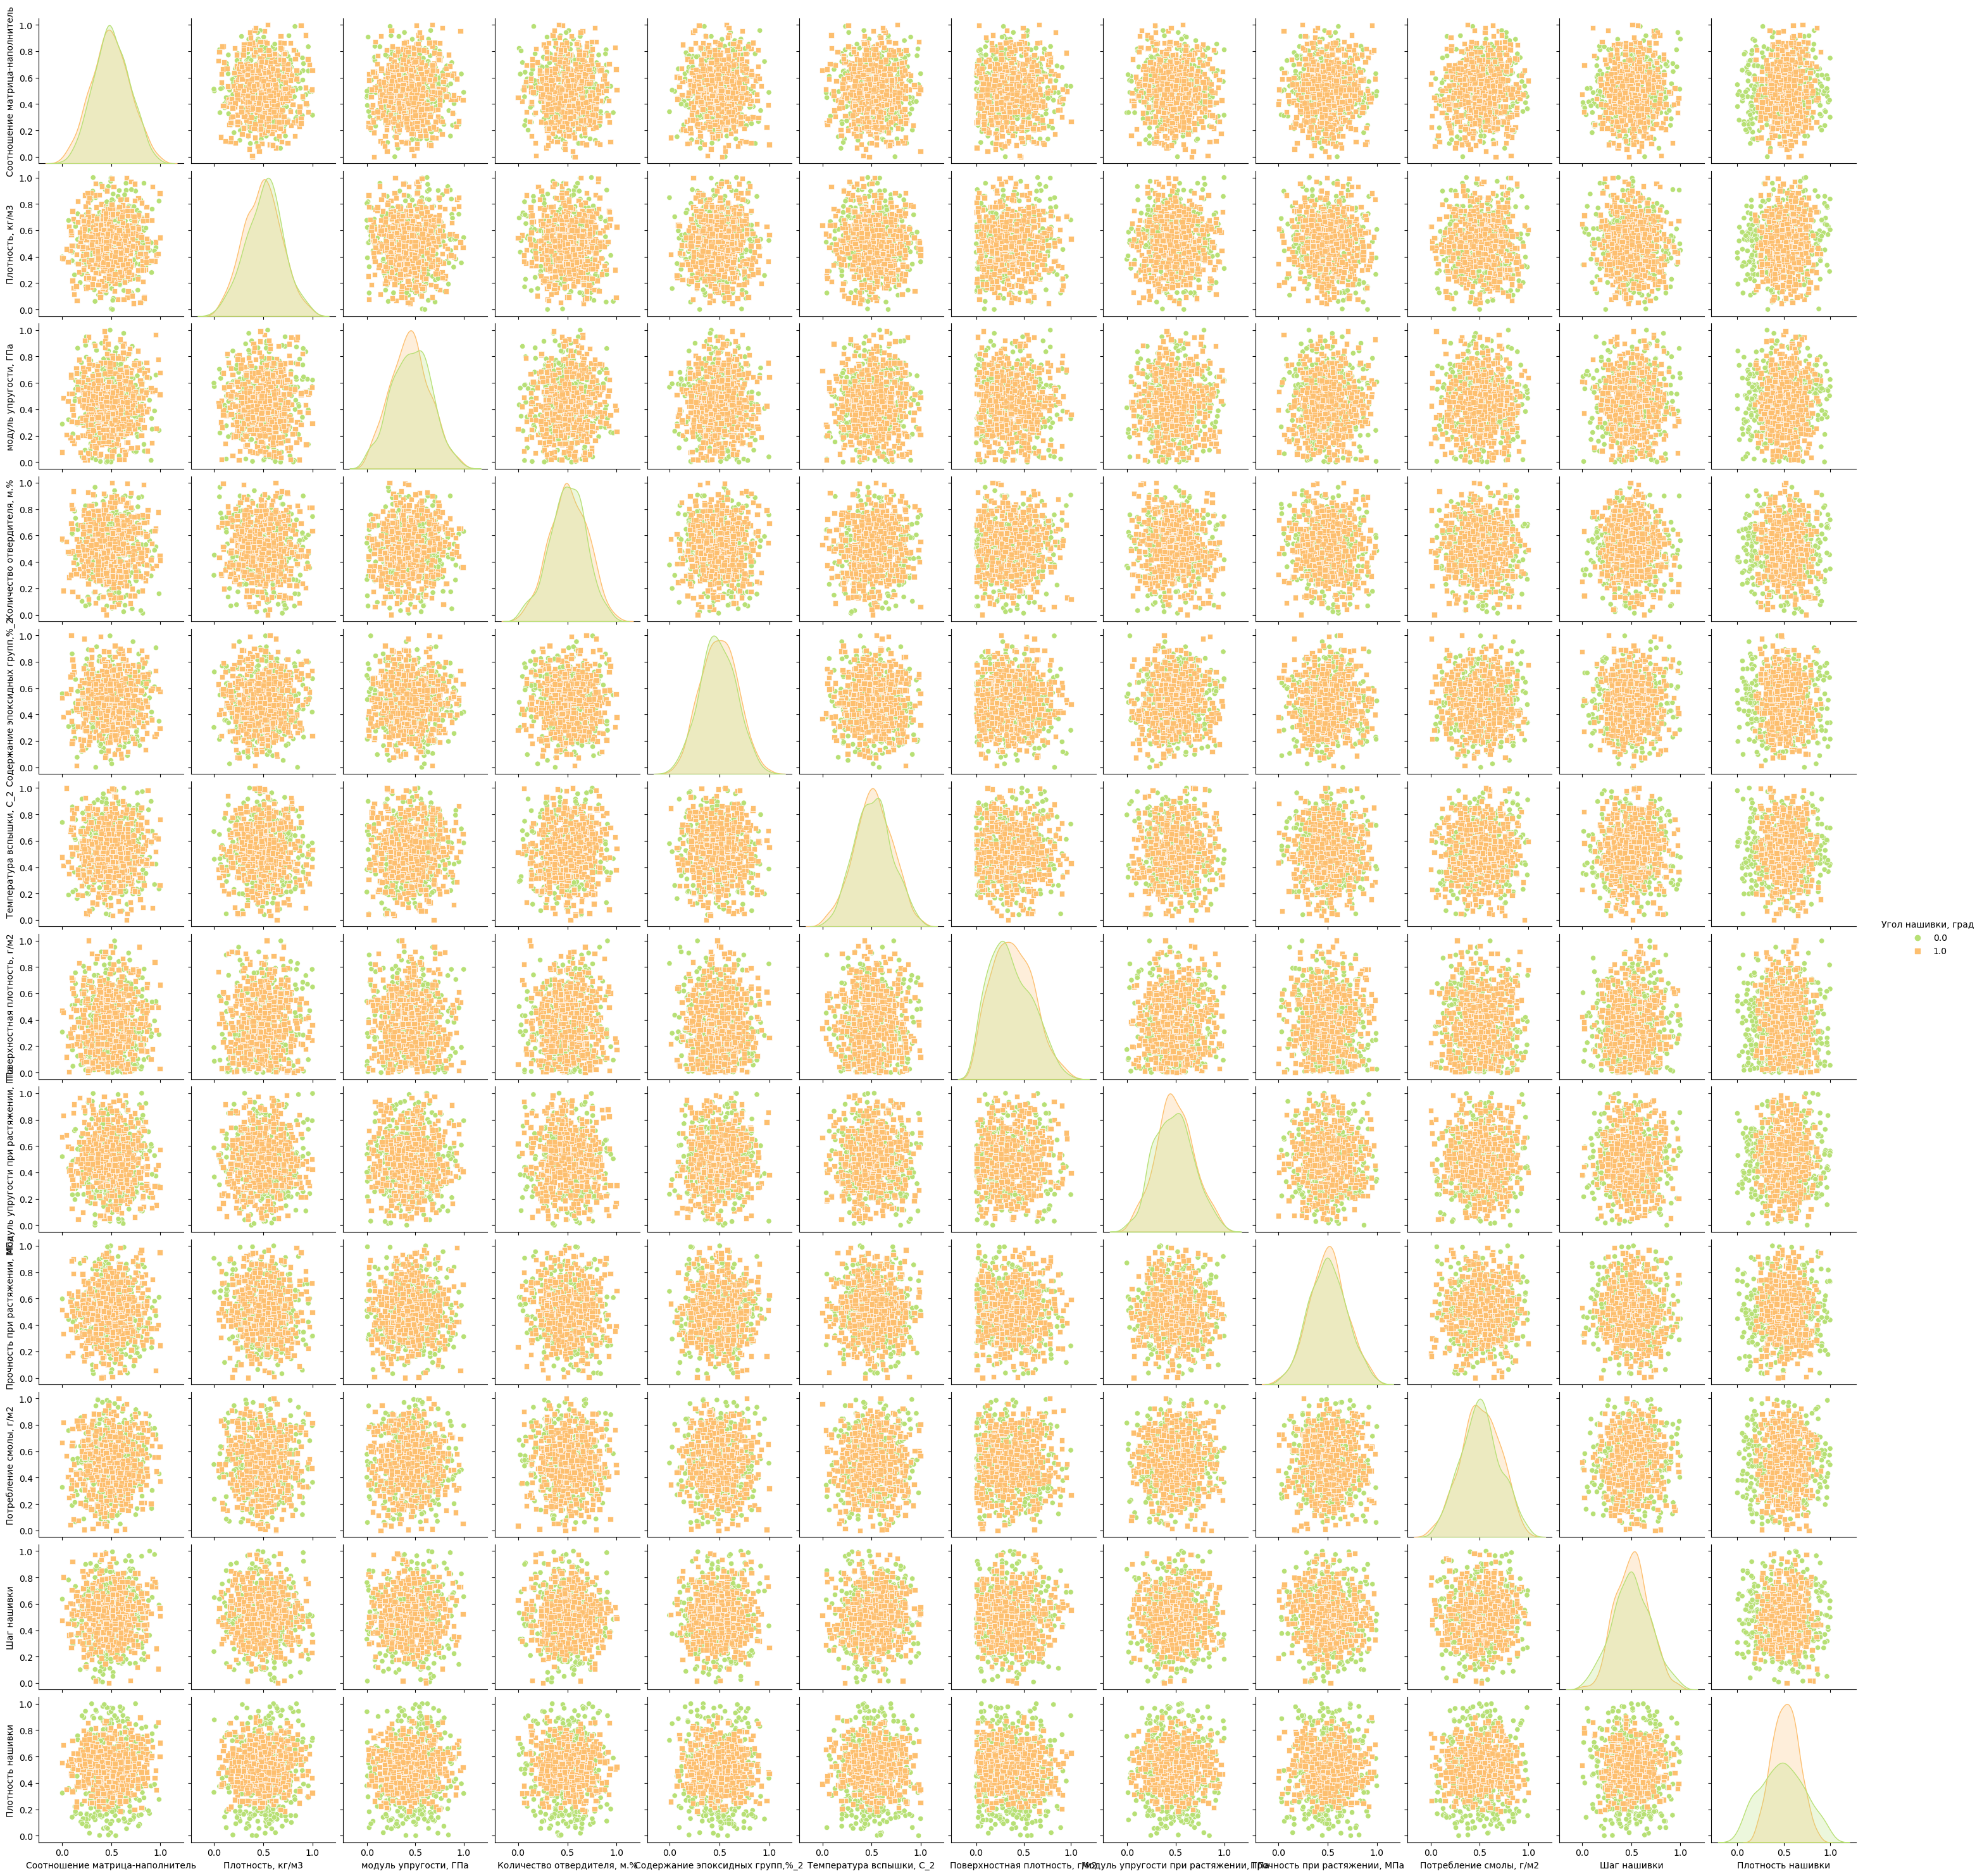

In [104]:
sb.pairplot(minmax, hue = 'Угол нашивки, град', markers = ["o", "s"], diag_kind = 'auto', palette = 'RdYlGn_r')

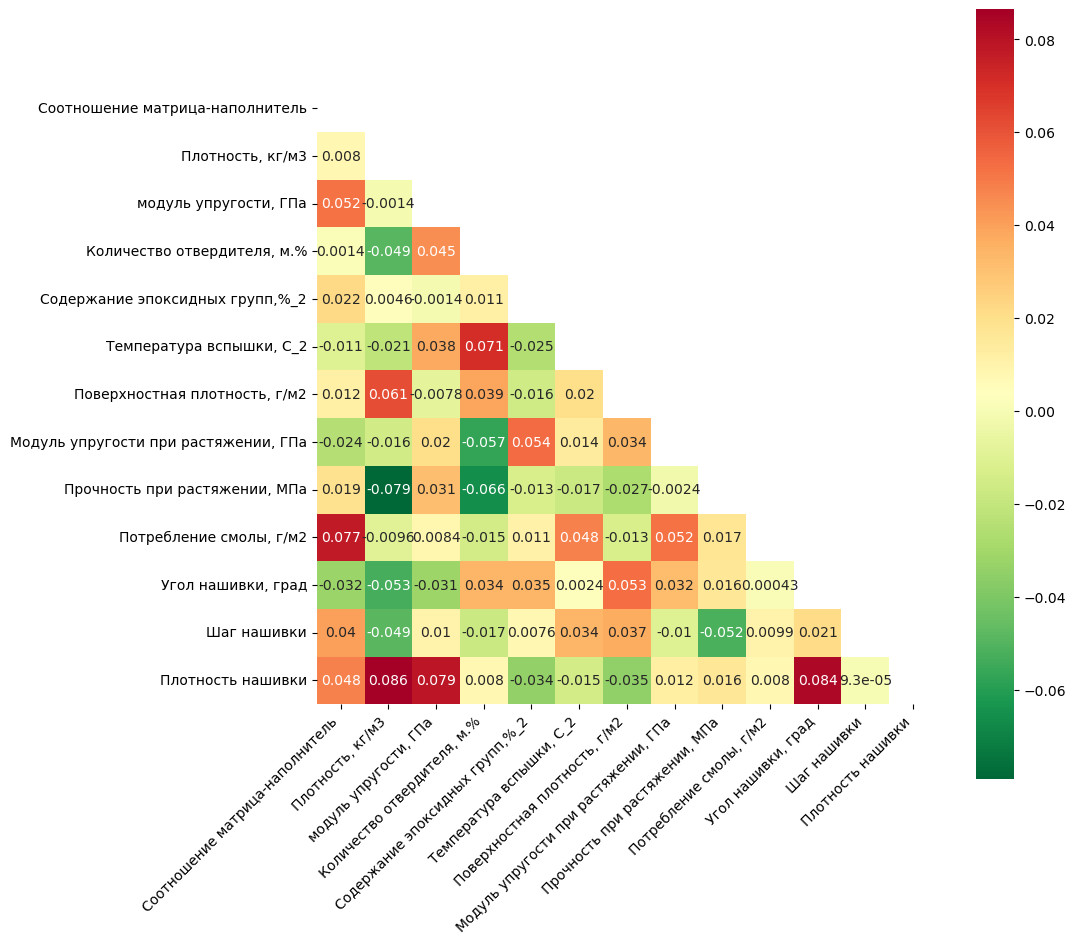

In [105]:
#Тепловая карта по minmax
mask = np.triu(minmax.corr())
f, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(minmax.corr(), mask = mask, annot = True, square = True, cmap = 'RdYlGn_r')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [106]:
#Нормализация данных с помощью Normalizer()
normalizer = Normalizer()
res = normalizer.fit_transform(DataF1_norm)
normal = pd.DataFrame(res, columns = DataF1_norm.columns)
normal

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
917                         0.000700          0.601751               0.281397   
918                         0.001078          0.641795               0.139227   
919                         0.000953          0.573123               0.121122   
920                         0.001192          0.664667               0.238453   
921                         0.001071          0.531728               0.117381   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
917                     0.026816                         0.006203   
918                     0.045701                         0.006136   
919                     0.032118                         0.006961   
920                     0.045473                         0.006190   
921                     0.036336                         0.007728   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
917                  0.100115                       0.064488   
918                  0.079584                       0.109777   
919                  0.072186                       0.215067   
920                  0.088689                       0.206291   
921                  0.084651                       0.213418   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
917                              0.022531                       0.735908   
918                              0.022828                       0.738938   
919                              0.021716                       0.773775   
920                              0.023812                       0.666248   
921                              0.020902                       0.803417   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
917                 0.038535            0.000308     0.002798   
9

In [107]:
min_and_max = DataF1.describe()
min_and_max.loc[['min', 'max']].T

min          max
Соотношение матрица-наполнитель          0.547391     5.314144
Плотность, кг/м3                      1784.482245  2161.565216
модуль упругости, ГПа                    2.436909  1628.000000
Количество отвердителя, м.%             38.668500   181.828448
Содержание эпоксидных групп,%_2         15.695894    28.955094
Температура вспышки, С_2               179.374391   386.067992
Поверхностная плотность, г/м2            0.603740  1291.340115
Модуль упругости при растяжении, ГПа    65.793845    81.203147
Прочность при растяжении, МПа         1250.392802  3654.434359
Потребление смолы, г/м2                 72.530873   359.052220
Угол нашивки, град                       0.000000     1.000000
Шаг нашивки                              0.037639    13.732404
Плотность нашивки                       28.661632    86.012427

In [108]:
min_and_max = normal.describe()
min_and_max.loc[['min', 'max']].T

min       max
Соотношение матрица-наполнитель       0.000163  0.001803
Плотность, кг/м3                      0.444650  0.824241
модуль упругости, ГПа                 0.000709  0.525102
Количество отвердителя, м.%           0.011339  0.062919
Содержание эпоксидных групп,%_2       0.004113  0.010887
Температура вспышки, С_2              0.049402  0.147961
Поверхностная плотность, г/м2         0.000230  0.414371
Модуль упругости при растяжении, ГПа  0.016108  0.030620
Прочность при растяжении, МПа         0.463136  0.877580
Потребление смолы, г/м2               0.021630  0.122973
Угол нашивки, град                    0.000000  0.000419
Шаг нашивки                           0.000011  0.004519
Плотность нашивки                     0.007195  0.030927

<AxesSubplot:ylabel='Density'>

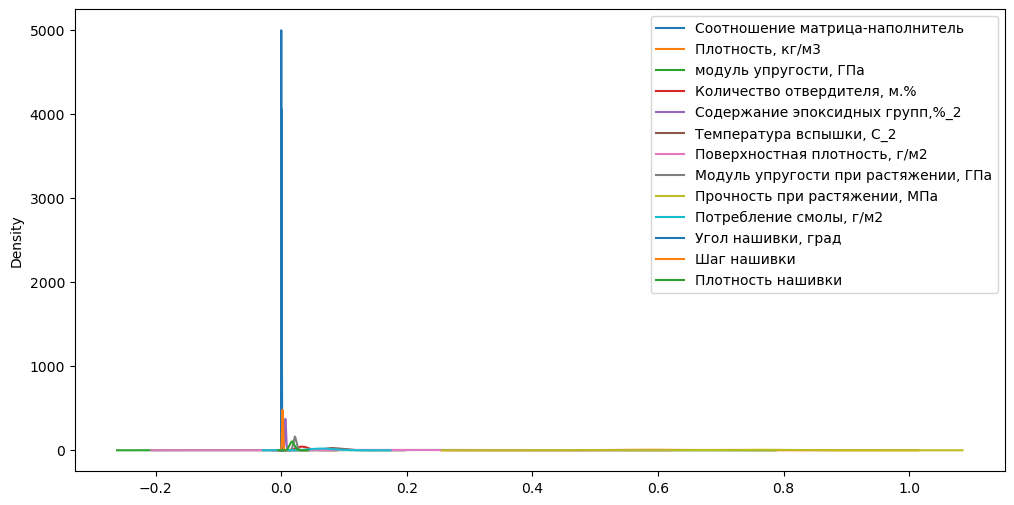

In [109]:
#график плотности распределения
ig, ax = plt.subplots(figsize = (12, 6))
normal.plot(kind = 'kde', ax = ax)

In [110]:
#Выводим первые 3 строки
DataF1_norm.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               60.0  
1                    220.0                   0          5.0               47.0  
2                    220.0                   0          5.0               57.0

In [111]:
minmax.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.452951   
1                         0.274768          0.651097               0.452951   
2                         0.466552          0.651097               0.461725   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.272962                       0.727777   
1                              0.272962                       0.727777   
2                              0.272962                       0.727777   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.514688                 0.0     0.289334           0.546433  
1                 0.514688                 0.0     0.362355           0.319758  
2                 0.514688                 0.0     0.362355           0.494123

In [112]:
normal.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.000499          0.545436               0.198490   
1                         0.000499          0.545011               0.198335   
2                         0.000744          0.544829               0.202097   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.013434                         0.006381   
1                     0.034634                         0.005705   
2                     0.030022                         0.005976   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.076473                       0.056424   
1                  0.080543                       0.056380   
2                  0.076388                       0.056362   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.018808                       0.806064   
1                              0.018793                       0.805435   
2                              0.018787                       0.805167   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.059111                 0.0     0.001075           0.016121  
1                 0.059065                 0.0     0.001342           0.012618  
2                 0.059046                 0.0     0.001342           0.015298

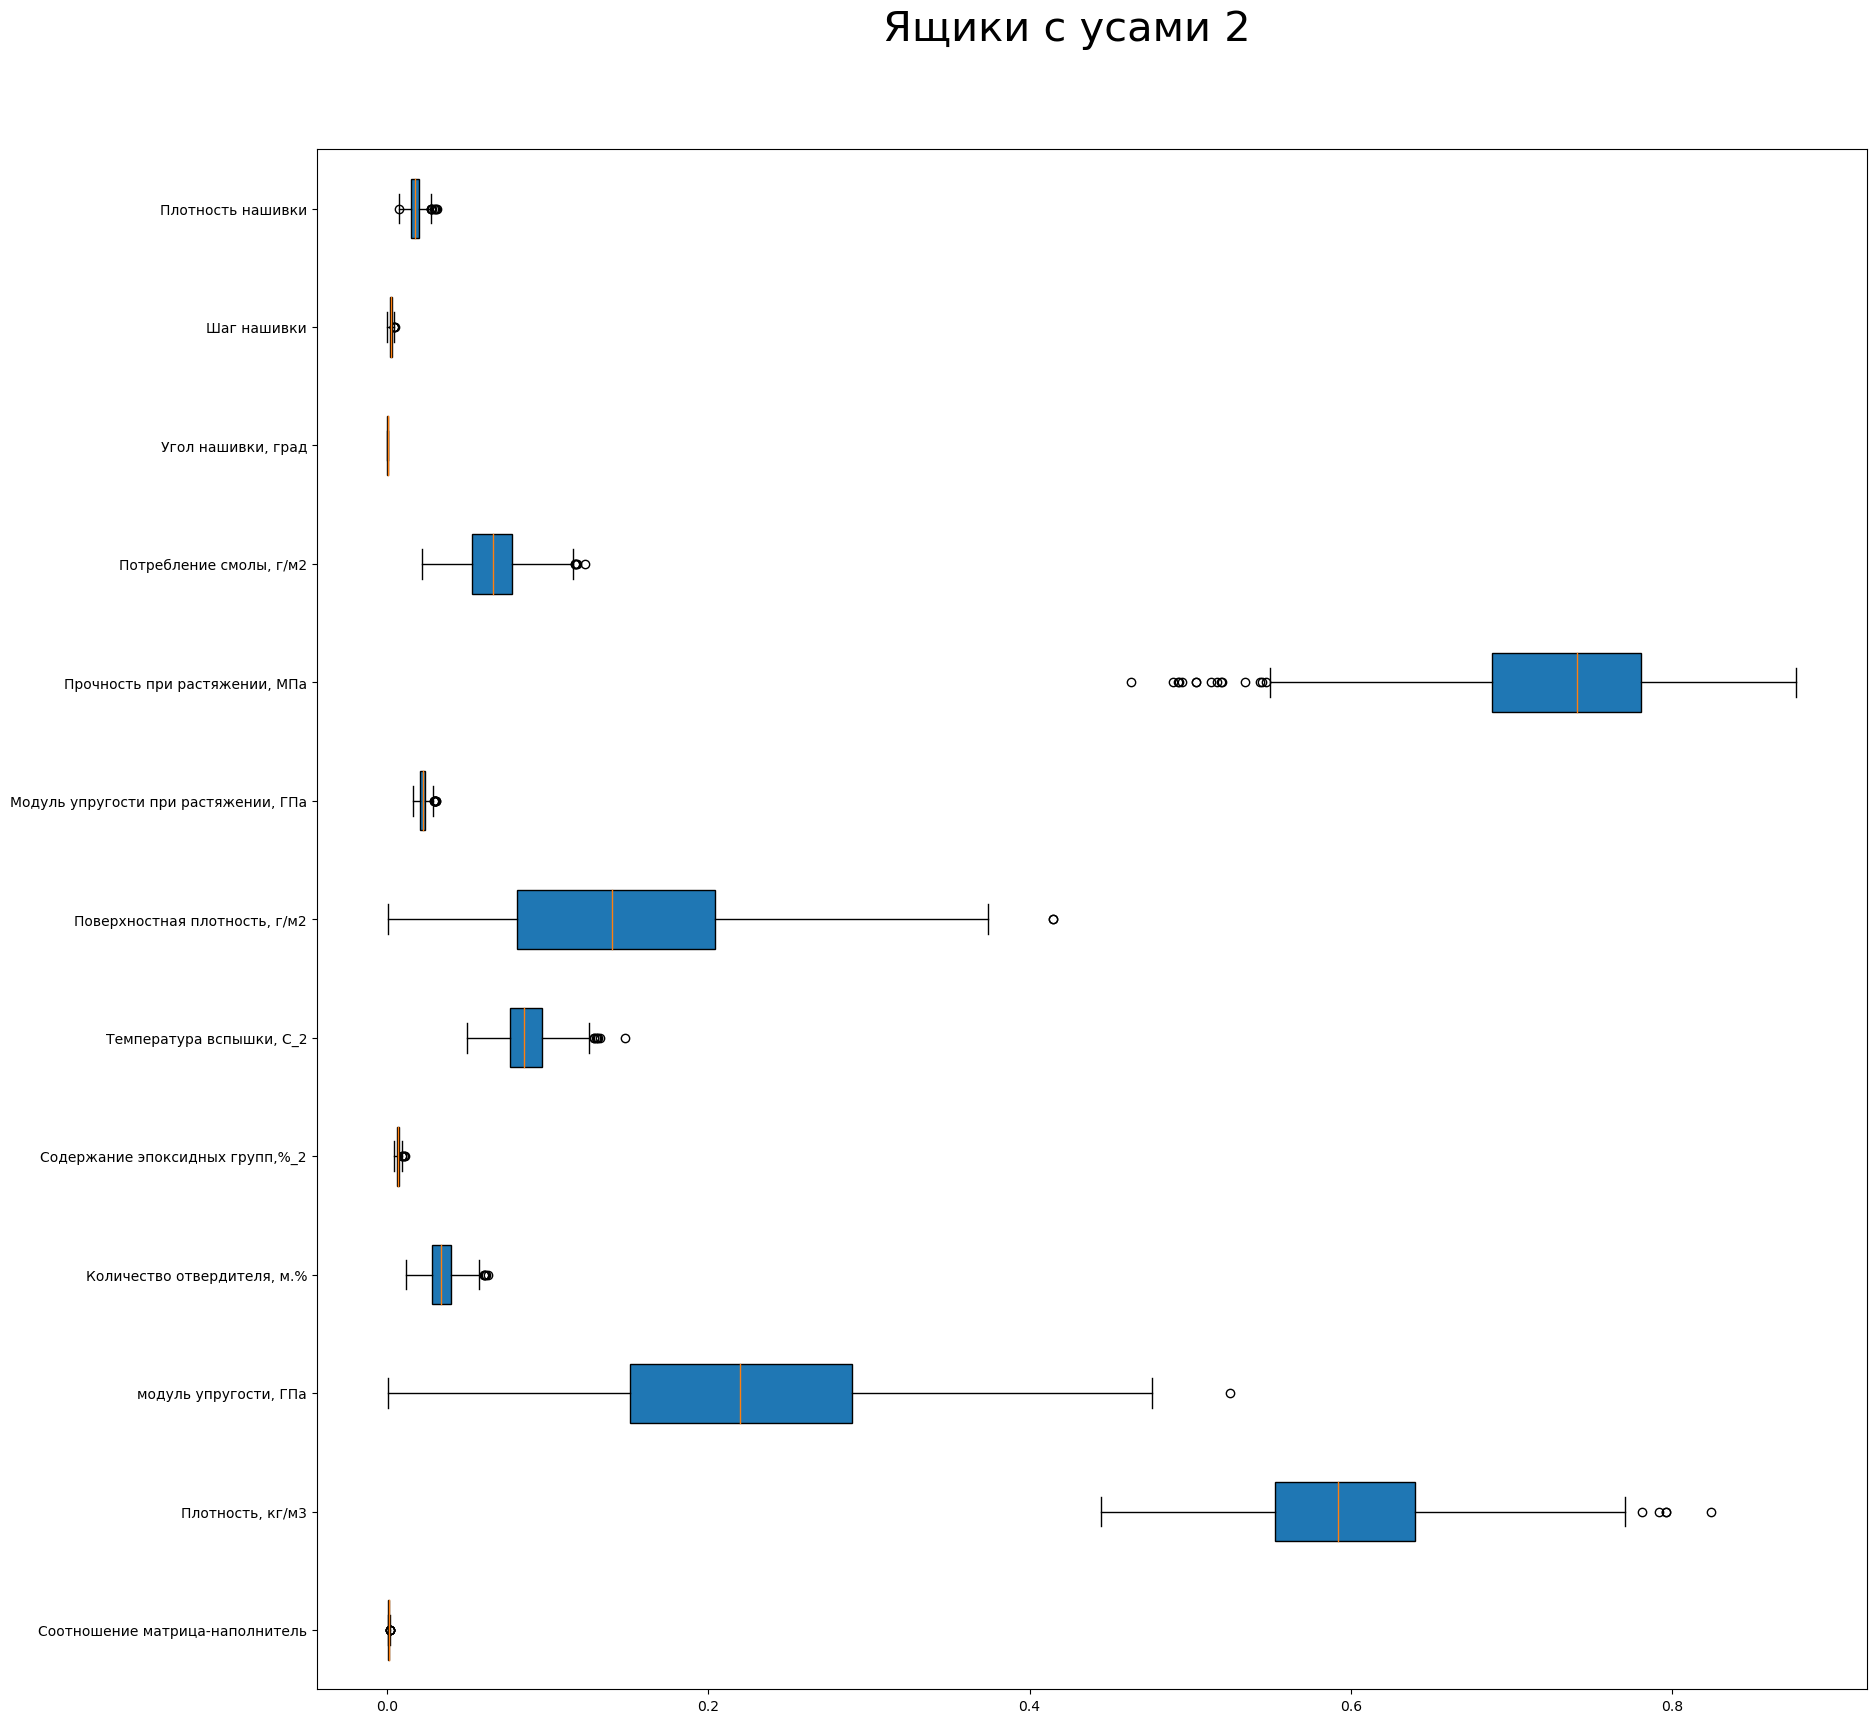

In [113]:
#Ящики с усами 2, очень много выбросов, если стандартизация Normalizer
scaler = Normalizer()
scaler.fit(normal)
plt.figure(figsize = (20, 20))
plt.suptitle('Ящики с усами 2', y = 0.95, fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(normal)),
labels = normal.columns, patch_artist = True, meanline = True, vert = False)
plt.show()

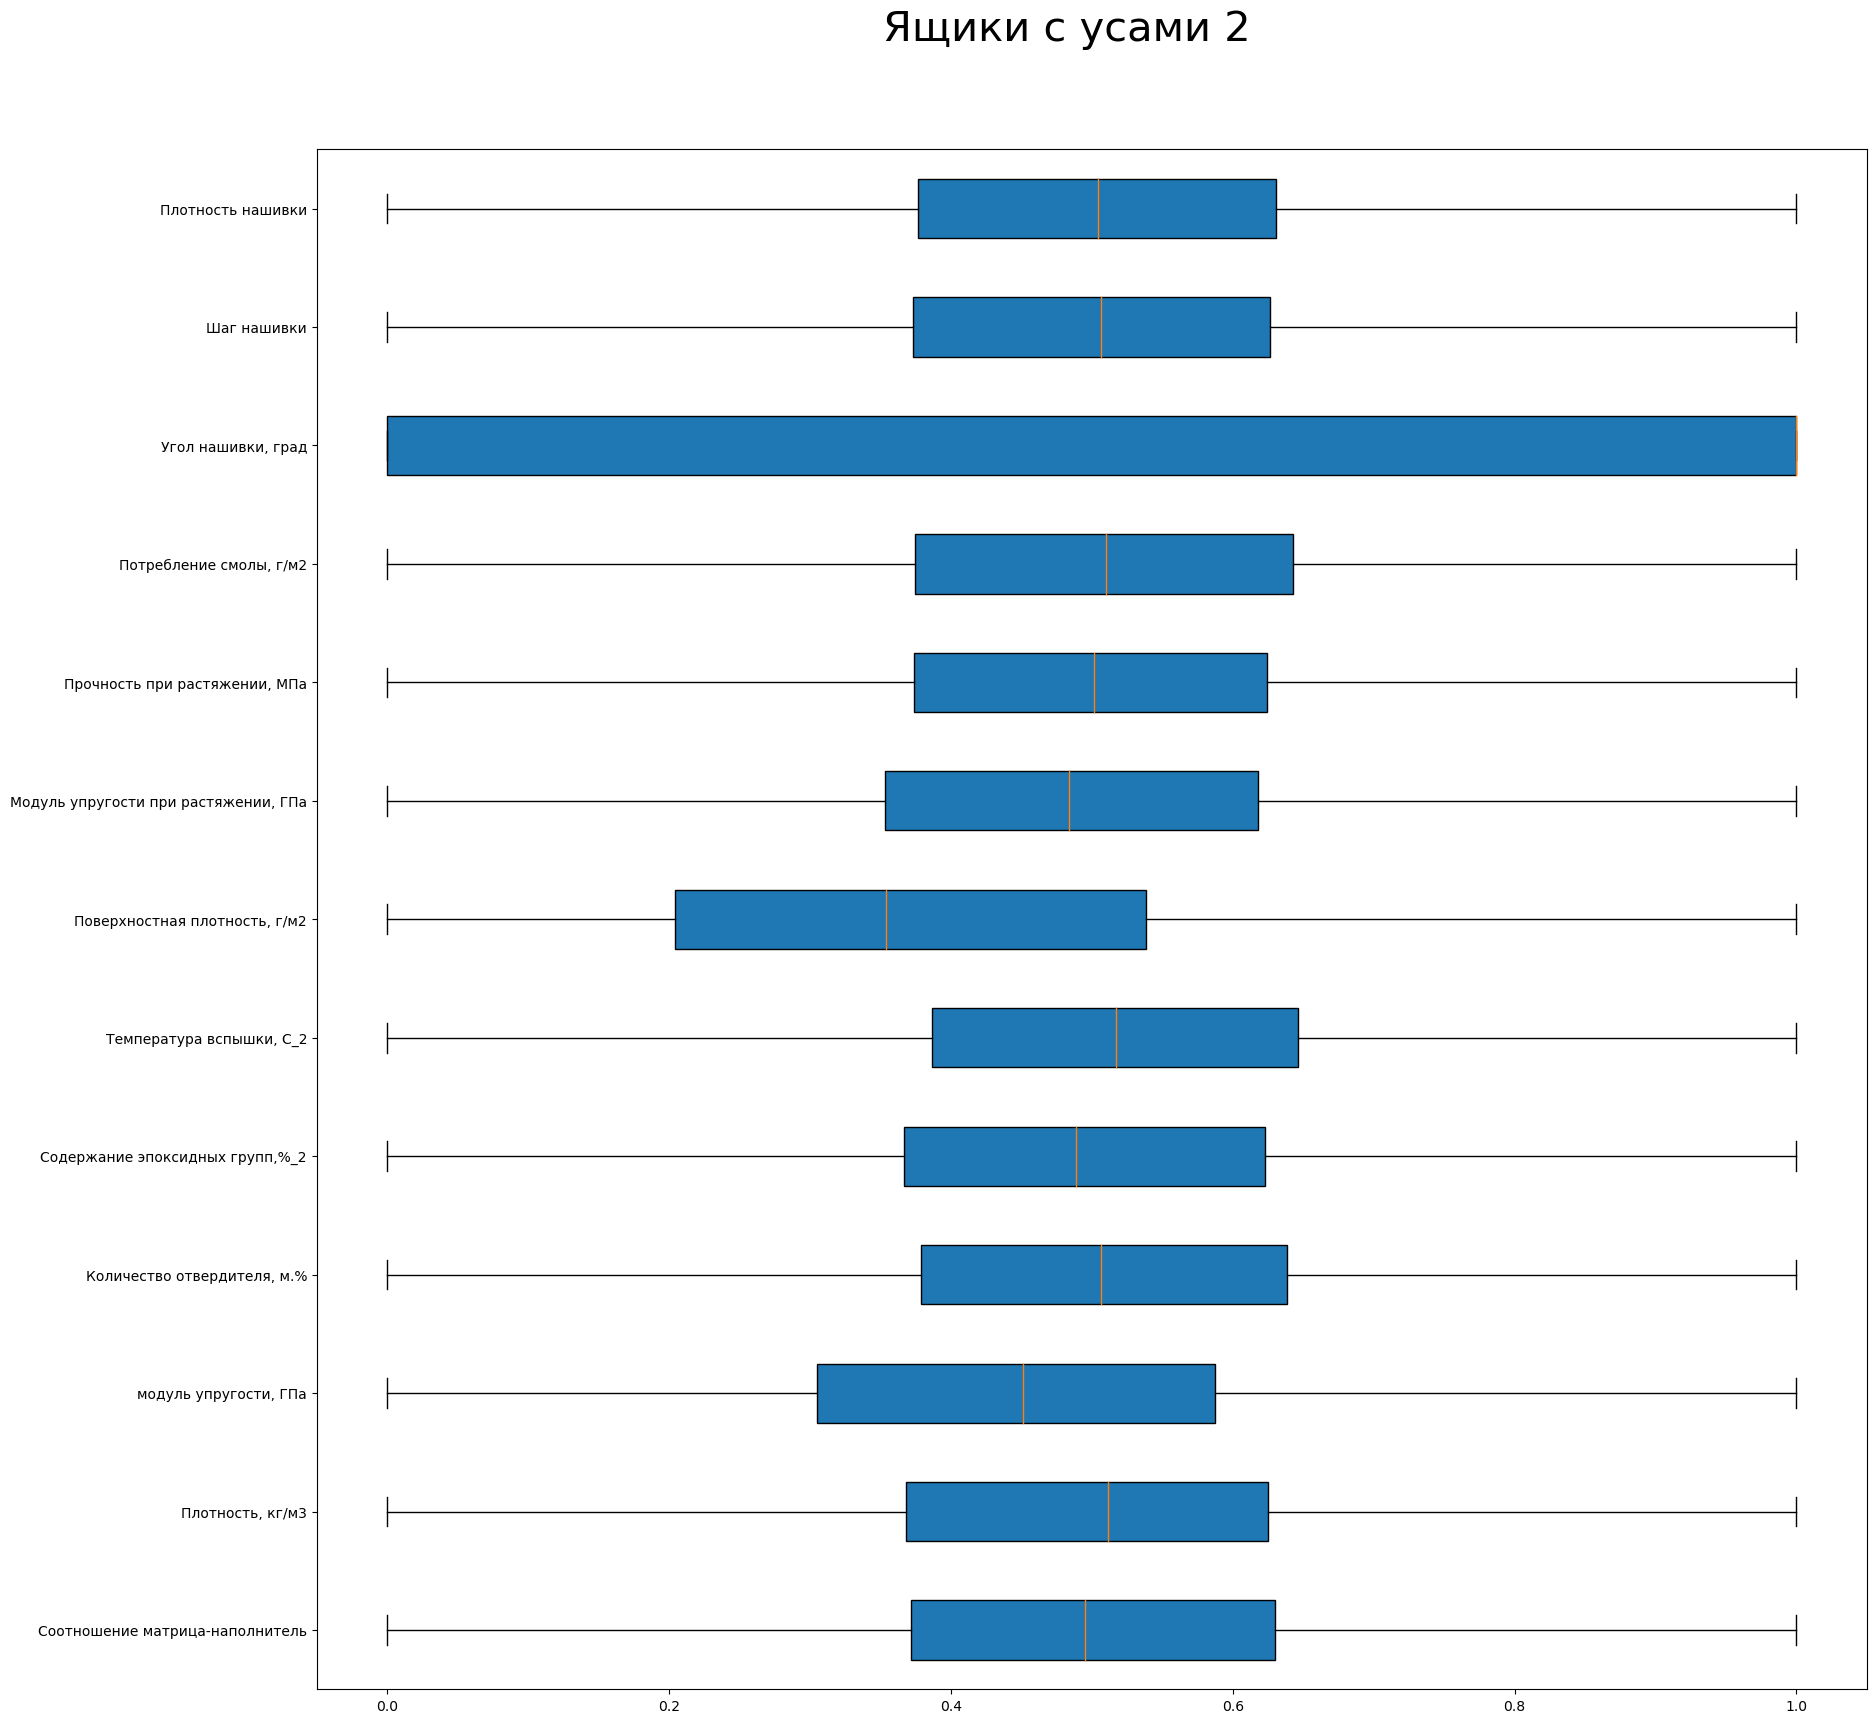

In [114]:
#Ящики с усами 2 min max
scaler = MinMaxScaler()
scaler.fit(minmax)
plt.figure(figsize = (20, 20))
plt.suptitle('Ящики с усами 2', y = 0.95, fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(minmax)),
labels = minmax.columns, patch_artist = True, meanline = True, vert = False)
plt.show()

<AxesSubplot:ylabel='Density'>

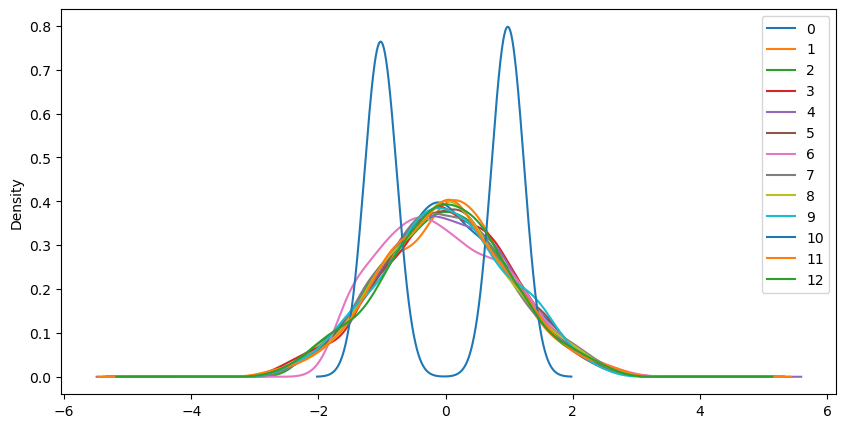

In [115]:
#Стандартизация
st_minmax = DataF1.copy()
st_minmax_res = preprocessing.StandardScaler().fit(st_minmax)
st_minmax_res = st_minmax_res.transform(st_minmax)
st_minmax_res = pd.DataFrame(st_minmax_res)
fig, ax = plt.subplots(figsize = (10, 5))
st_minmax_res.plot(kind = 'kde', ax = ax)

In [116]:
st_minmax_res

0         1         2         3         4         5         6   \
0   -1.196467  0.787037  0.007992 -2.286425  0.647585 -0.039740 -0.971971   
1   -1.196467  0.787037  0.007992  0.668092 -0.397291  0.350738 -0.971971   
2   -0.175012  0.787037  0.051553  0.027074  0.028123 -0.039740 -0.971971   
3   -0.178825  0.364514  0.036283  0.027074  0.028123 -0.039740 -0.971971   
4   -0.400390 -0.903054  0.216474  0.027074  0.028123 -0.039740 -0.971971   
..        ...       ...       ...       ...       ...       ...       ...   
917 -0.733662 -0.310284  0.539767 -0.902956 -0.868217  0.979545 -0.974830   
918  0.576611  1.069974 -0.889924  1.303201 -1.087006 -0.811326 -0.470122   
919  0.394018 -0.024589 -0.975122 -0.022536  0.734311 -0.958342  0.919470   
920  0.868603  1.305328  0.016356  1.131763 -1.234469 -0.263996  0.567419   
921  0.983318 -1.178912 -0.973657  0.674952  2.204352  0.374919  0.985849   

           7         8         9         10        11        12  
0   -1.092335  1.187925  0.034181 -1.021932 -1.166792  0.219240  
1   -1.092335  1.187925  0.034181 -1.021932 -0.768833 -0.950227  
2   -1.092335  1.187925  0.034181 -1.021932 -0.768833 -0.050637  
3   -1.092335  1.187925  0.034181 -1.021932 -0.768833  0.219240  
4   -1.092335  1.187925  0.034181 -1.021932 -0.768833  1.118831  
..        ...       ...       ...       ...       ...       ...  
917 -0.070267 -0.163679 -1.629244  0.978538  0.853400 -0.948449  
918 -0.126524 -0.223019 -1.756683  0.978538  1.446055 -0.342933  
919  0.473140  0.444312  0.324984  0.978538 -1.102660  0.905599  
920  0.244441 -0.859827 -0.366368  0.978538 -0.246233  0.062808  
921  0.332727  0.870993 -0.407900  0.978538 -0.339474  1.787628  

[922 rows x 13 columns]

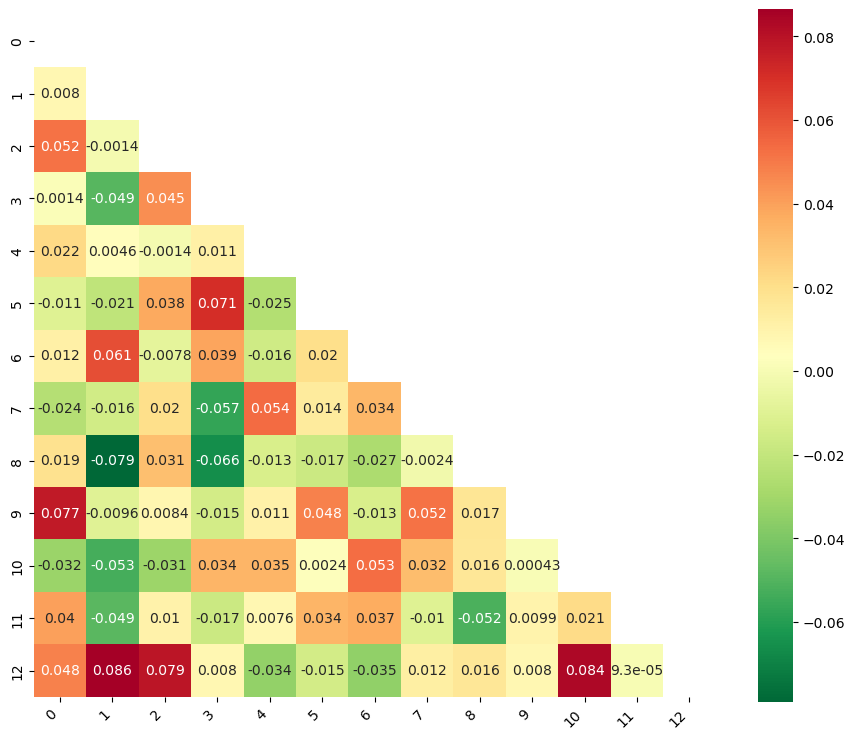

In [117]:
# Визуализация данных после обработки
mask = np.triu(st_minmax_res.corr())
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(st_minmax_res.corr(), mask=mask, annot=True, square=True, cmap='RdYlGn_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:
# Разбиваем на тестовую, тренировочную выборки (Прочность при растяжении)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    DataF1.loc[:, DataF1.columns != 'Прочность при растяжении, МПа'],
    DataF1[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [127]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [128]:
#Метод К ближайших соседей

In [129]:
loss_df =pd.DataFrame([])

In [130]:
def add_loss(loss_df, model_name, perem, y_pred, y_test):
  MSE = mean_squared_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)
  df = pd.DataFrame({'model':model_name,\
                                'target':[perem],\
                                'MSE':MSE,\
                                'R2':R2})
  loss_df = pd.concat([loss_df, df],ignore_index=True)
  return loss_df

In [131]:
# Метод К ближайших соседей
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train_1, y_train_1)
y_pred_knn = knr.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
print('K Neighbors Regressor  Results Train:')
print("Score: {:.2f}".format(knr.score(x_train_1, y_train_1)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print("Test score: {:.2f}".format(knr.score(x_test_1, y_test_1)))

K Neighbors Regressor  Results Train:
Score: 0.23
K Neighbors Regressor  Results:
KNN_MAE:  406
KNN_MAPE: 0.18
Test score: -0.18


In [132]:
model_name = 'Метод к ближайших соседей'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_knn,y_test_1)
loss_df

model                         target            MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  253428.682556   

        R2  
0 -0.18399

In [125]:
 #Метод случайного леса

In [ ]:
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y_pred_forest = rfr.predict(x_test_1)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(rfr.score(x_train_1, y_train_1))) 
print('RF_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_forest)))
print("Test score: {:.2f}".format(rfr.score(x_test_1, y_test_1)))

In [ ]:
model_name = 'Метод случайного леса'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_forest,y_test_1)
loss_df

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_forest, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [ ]:
#Метод линейной регрессии
lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
print('Резульатат:')
print("Score: {:.2f}".format(lr.score(x_train_1, y_train_1)))
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_1, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_lr)))
print("Test score: {:.2f}".format(lr.score(x_test_1, y_test_1)))

In [ ]:
model_name = 'Метод линейной регрессии'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_lr,y_test_1)
loss_df

In [ ]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr, label="Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [ ]:
#Метода градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(gbr.score(x_train_1, y_train_1))) # Скор для тренировочной выборки
print('GBR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print("Test score: {:.2f}".format(gbr.score(x_test_1, y_test_1)))# Скор для тестовой выборки


In [ ]:
model_name = 'Метод градиентного бустинга'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_gbr,y_test_1)
loss_df

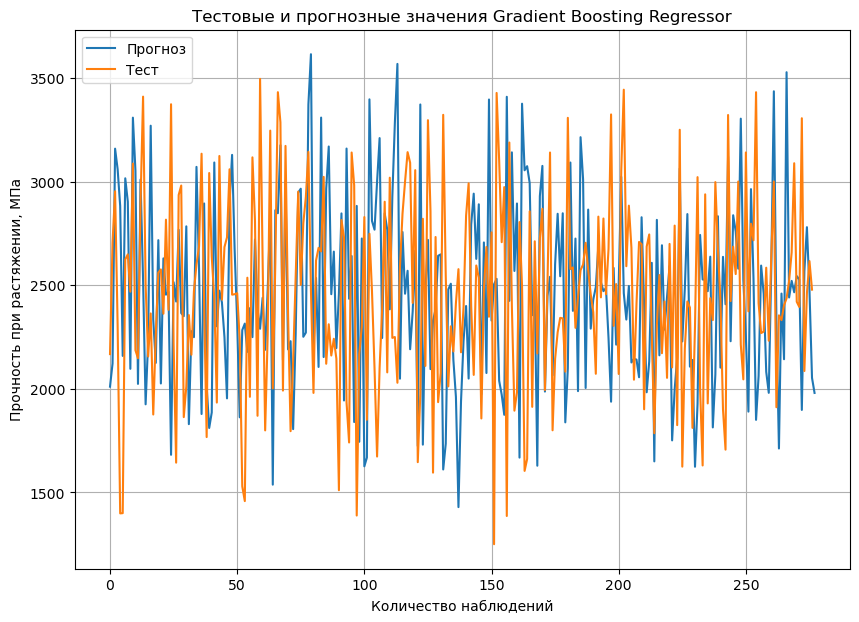

In [133]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);
#Градиентный бустинг

In [134]:
#Деревья решений 
dtr = DecisionTreeRegressor()
dtr.fit(x_train_1, y_train_1)
y_pred_dtr = dtr.predict(x_test_1)
mae_dtr = mean_absolute_error(y_pred_dtr, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(dtr.score(x_train_1, y_train_1)))
print('DTR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_dtr)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_dtr)))
print("Test score: {:.2f}".format(dtr.score(x_test_1, y_test_1)))

Результат:
Score: 1.00
DTR_MAE:  497
DTR_MAPE: 0.21
Test score: -0.82


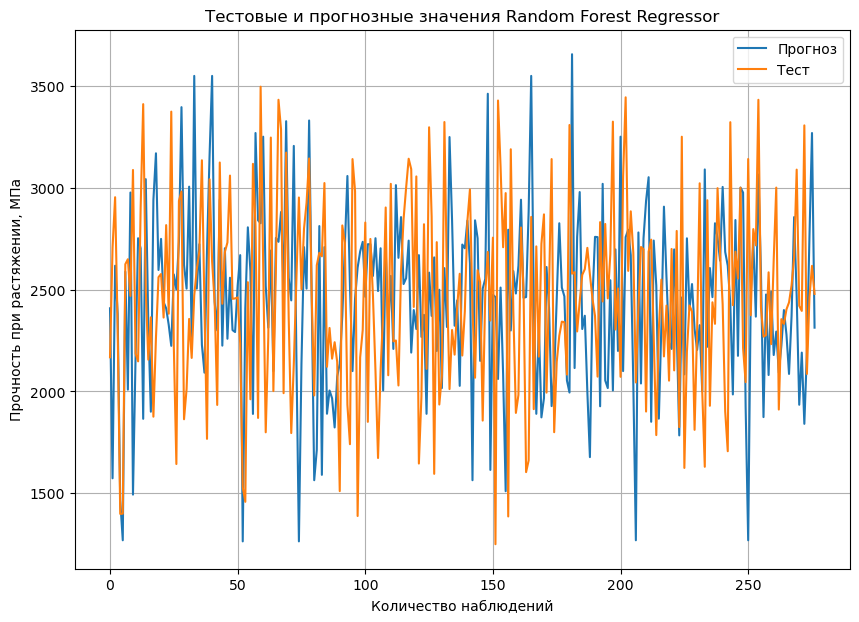

In [135]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_dtr, label = "Прогноз")
plt.plot(y_test_1.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [142]:
model_name = 'Метод - деревья решений'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_dtr,y_test_1)
loss_df

model                         target            MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  253428.682556   
1    Метод - деревья решений  Прочность при растяжении, МПа  389045.590041   
2                      Лaссо  Прочность при растяжении, МПа  215176.693194   
3    Метод - деревья решений  Прочность при растяжении, МПа  389045.590041   

         R2  
0 -0.183990  
1 -0.817576  
2 -0.005281  
3 -0.817576

In [143]:
y_train_1

Прочность при растяжении, МПа
481                    2641.571967
650                    2404.068921
483                    2619.854215
355                    2793.783901
850                    2298.985700
..                             ...
106                    1994.674603
270                    2419.732206
860                    2758.414767
435                    2347.135204
102                    1529.604423

[645 rows x 1 columns]

In [144]:
# Лассо регрессия
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train_1, y_train_1)
y_pred_clf = clf.predict(x_test_1)
mae_clf = mean_absolute_error(y_pred_clf, y_test_1)
print('Результат:')
print("Score: {:.2f}".format(clf.score(x_train_1, y_train_1)))
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_clf)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_clf)))
print("Test score: {:.2f}".format(clf.score(x_test_1, y_test_1)))

Результат:
Score: 0.02
SGD_MAE:  373
SGD_MAPE: 0.16
Test score: -0.01


In [145]:
model_name = 'Лaссо'
perem = 'Прочность при растяжении, МПа'
loss_df = add_loss(loss_df,model_name,perem,y_pred_clf,y_test_1)
loss_df

model                         target            MSE  \
0  Метод к ближайших соседей  Прочность при растяжении, МПа  253428.682556   
1    Метод - деревья решений  Прочность при растяжении, МПа  389045.590041   
2                      Лaссо  Прочность при растяжении, МПа  215176.693194   
3    Метод - деревья решений  Прочность при растяжении, МПа  389045.590041   
4                      Лaссо  Прочность при растяжении, МПа  215176.693194   

         R2  
0 -0.183990  
1 -0.817576  
2 -0.005281  
3 -0.817576  
4 -0.005281

In [146]:
#Cравнение моделей по МАЕ
mae_df = {'Регрессор': [ 'Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений','Лассо'], 'MAE': [ mae_rfr, mae_lr, mae_gbr, mae_knr, mae_dtr, mae_clf]} 

mae_df = pd.DataFrame(mae_df)
mae_df


Регрессор         MAE
0        Случайный лес   75.724864
1   Линейная регрессия   64.595424
2  Градиентный бустинг   62.364877
3   К ближайшие соседи  405.986731
4      Деревья решений  496.868307
5                Лассо  373.037932

In [147]:
#Сравнение ошибок

y2_pred_rfr=rfr.predict(x_train_1)
mae_rfr_tr = mean_absolute_error(y2_pred_rfr, y_train_1)

y2_pred_lr=lr.predict(x_train_1)
mae_lr_tr = mean_absolute_error(y2_pred_lr, y_train_1)

y2_pred_gbr=gbr.predict(x_train_1)
mae_gbr_tr = mean_absolute_error(y2_pred_gbr, y_train_1)

y2_pred_knr=knr.predict(x_train_1)
mae_knr_tr = mean_absolute_error(y2_pred_knr, y_train_1)

y2_pred_dtr=dtr.predict(x_train_1)
mae_dtr_tr = mean_absolute_error(y2_pred_dtr, y_train_1)

y2_pred_clf=clf.predict(x_train_1)
mae_clf_tr = mean_absolute_error(y2_pred_clf, y_train_1)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [148]:
#Cравнение моделей по МАЕ
mae_df = {'Регрессор': ['Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений', 'Лассо'],
 'MAE_Test': [ mae_rfr, mae_lr, mae_gbr, mae_knr, mae_dtr, mae_clf],
 'MAE_Train': [ mae_rfr_tr, mae_lr_tr, mae_gbr_tr, mae_knr_tr, mae_dtr_tr, mae_clf_tr],
 'MAE_Tr%T': [ mae_rfr_tr/mae_rfr, mae_lr_tr/mae_lr, mae_gbr_tr/mae_gbr, mae_knr_tr/mae_knr, mae_dtr_tr/mae_dtr, mae_clf_tr/mae_clf]} 

mae_df = pd.DataFrame(mae_df)
mae_df

Регрессор    MAE_Test  MAE_Train  MAE_Tr%T
0        Случайный лес   75.724864   1.824824  0.024098
1   Линейная регрессия   64.595424   2.422902  0.037509
2  Градиентный бустинг   62.364877   1.631628  0.026163
3   К ближайшие соседи  405.986731   2.154926  0.005308
4      Деревья решений  496.868307   0.000000  0.000000
5                Лассо  373.037932   2.437003  0.006533

In [152]:
#Поиск гиперпараметров.
#Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

# Создание случайного леса
rfr = RandomForestRegressor(random_state=42)

# Определение параметров для поиска по сетке
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }

# Создание объекта GridSearchCV
grid = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)

# Обучение модели с использованием поиска по сетке
grid.fit(x_train_1, y_train_1)

# Вывод наилучших параметров
print(grid.best_params_)

{'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 300}


In [153]:
#Выводим гиперпараметры для оптимальной модели
print(grid.best_estimator_)
knr_upr = grid.best_estimator_
print(f'R2-score RFR для прочности при растяжении, МПа: {knr_upr.score(x_test_1, y_test_1).round(3)}')
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr_grid = RandomForestRegressor(n_estimators = 300, criterion = 'mse', max_depth = 15, max_features = 'auto')
#Обучаем модель
rfr_grid.fit(x_train_1, y_train_1)
    
predictions_rfr_grid = rfr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_rfr_grid = mean_absolute_error(predictions_rfr_grid, y_test_1)
mae_rfr_grid

RandomForestRegressor(criterion='mse', max_depth=9, n_estimators=300,
                      random_state=42)
R2-score RFR для прочности при растяжении, МПа: -0.017


375.2812260436762

In [151]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(x_train_1, y_train_1)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 95, 'weights': 'uniform'}

In [154]:
#Выводим гиперпараметры для оптимальной модели
print(gs.best_estimator_)
gs1 = gs.best_estimator_
print(f'R2-score KNR для прочности при растяжении, МПа: {gs1.score(x_test_1, y_test_1).round(3)}')
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn_grid = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 5, weights = 'distance')
#Обучаем модель
knn_grid.fit(x_train_1, y_train_1)

predictions_knn_grid = knn_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_knn_grid = mean_absolute_error(predictions_knn_grid, y_test_1)
mae_knn_grid

KNeighborsRegressor(n_neighbors=95)
R2-score KNR для прочности при растяжении, МПа: 0.015


400.6971296648261

In [155]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs4 = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs4.fit(x_train_1, y_train_1)
dtr_3 = gs4.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'algorithm': 'auto', 'n_neighbors': 95, 'weights': 'uniform'}

In [156]:
#Выводим гиперпараметры для оптимальной модели
print(gs4.best_estimator_)
gs1 = gs4.best_estimator_
print(f'R2-score DTR для прочности при растяжении, МПа: {gs4.score(x_test_1, y_test_1).round(3)}')

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='sqrt',
                      min_samples_leaf=100, min_samples_split=300)
R2-score DTR для прочности при растяжении, МПа: 0.032


In [157]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr_grid = DecisionTreeRegressor(criterion = 'poisson', max_depth = 3, max_features = 'auto',
                      min_samples_leaf = 100, min_samples_split = 200)
#Обучаем модель
dtr_grid.fit(x_train_1, y_train_1)

predictions_dtr_grid = dtr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_dtr_grid = mean_absolute_error(predictions_dtr_grid, y_test_1)
mae_dtr_grid

376.1816339152644

In [158]:
dtr2_grid=dtr_grid.predict(x_train_1)
mae2_dtr_grid = mean_absolute_error(dtr2_grid, y_train_1)

knn2_grid=knn_grid.predict(x_train_1)
mae2_knn_grid = mean_absolute_error(knn2_grid, y_train_1)

rfr2_grid=rfr_grid.predict(x_train_1)
mae2_rfr_grid = mean_absolute_error(rfr2_grid, y_train_1)

In [159]:
new_row_in_mae = {'Регрессор': 'Деревья решений_Grid',
'MAE_Test': mae_dtr_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_dtr_grid/mae_dtr_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index = True)

new_row_in_mae = {'Регрессор': 'К ближайшие соседи_Grid',
'MAE_Test': mae_knn_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_knn_grid/mae_knn_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index=True)

new_row_in_mae = {'Регрессор': 'Случайный лес_Grid',
'MAE_Test': mae_rfr_grid,
'MAE_Train': mae2_rfr_grid,
'MAE_Tr%T': mae2_rfr_grid/mae_dtr_grid} 
mae_df = mae_df.append(new_row_in_mae, ignore_index=True)

mae_df

Регрессор    MAE_Test   MAE_Train  MAE_Tr%T
0            Случайный лес   75.724864    1.824824  0.024098
1       Линейная регрессия   64.595424    2.422902  0.037509
2      Градиентный бустинг   62.364877    1.631628  0.026163
3       К ближайшие соседи  405.986731    2.154926  0.005308
4          Деревья решений  496.868307    0.000000  0.000000
5                    Лассо  373.037932    2.437003  0.006533
6     Деревья решений_Grid  376.181634  355.118367  0.944008
7  К ближайшие соседи_Grid  400.697130  355.118367  0.000000
8       Случайный лес_Grid  375.281226  146.855268  0.390384

In [160]:
mae_df['MAE_Tr%T'] = roundplaces = np.round(mae_df['MAE_Tr%T'], decimals = 6) 
mae_df    

Регрессор    MAE_Test   MAE_Train  MAE_Tr%T
0            Случайный лес   75.724864    1.824824  0.024098
1       Линейная регрессия   64.595424    2.422902  0.037509
2      Градиентный бустинг   62.364877    1.631628  0.026163
3       К ближайшие соседи  405.986731    2.154926  0.005308
4          Деревья решений  496.868307    0.000000  0.000000
5                    Лассо  373.037932    2.437003  0.006533
6     Деревья решений_Grid  376.181634  355.118367  0.944008
7  К ближайшие соседи_Grid  400.697130  355.118367  0.000000
8       Случайный лес_Grid  375.281226  146.855268  0.390384

In [161]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [RandomForestRegressor(n_estimators = 100)],'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha = 0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': Lasso(alpha=0.1)}

Наилучшее значение правильности перекрестной проверки: -0.03
Правильность на тестовом наборе: -0.00
Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', Lasso(alpha=0.1))])


In [162]:
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', Lasso(alpha=0.1))])


In [163]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    normal.loc[:, normal.columns != 'Модуль упругости при растяжении, ГПа'],
    DataF1_norm[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [164]:
x_train_2.shape

(645, 12)

In [165]:
st_minmax[['Модуль упругости при растяжении, ГПа']]

Модуль упругости при растяжении, ГПа
0                               70.000000
1                               70.000000
2                               70.000000
3                               70.000000
4                               70.000000
..                                    ...
917                             73.090961
918                             72.920827
919                             74.734344
920                             74.042708
921                             74.309704

[922 rows x 1 columns]

In [166]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [167]:
#Метод опорных векторов
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
print('Support Vector Regression Results Train:') 
print("Score: {:.2f}".format(svr2.score(x_train_2, y_train_2)))
print('Support Vector Regression Results:')
print('SVR_MAE: {:.5f}'.format(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.5f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2)))
#Результаты модели, выдающей среднее значение
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))

Support Vector Regression Results Train:
Score: 0.90
Support Vector Regression Results:
SVR_MAE: 3.44780
SVR_MAPE: 0.04675
Test score: -0.94
MAE for mean target:  2.578499535756179


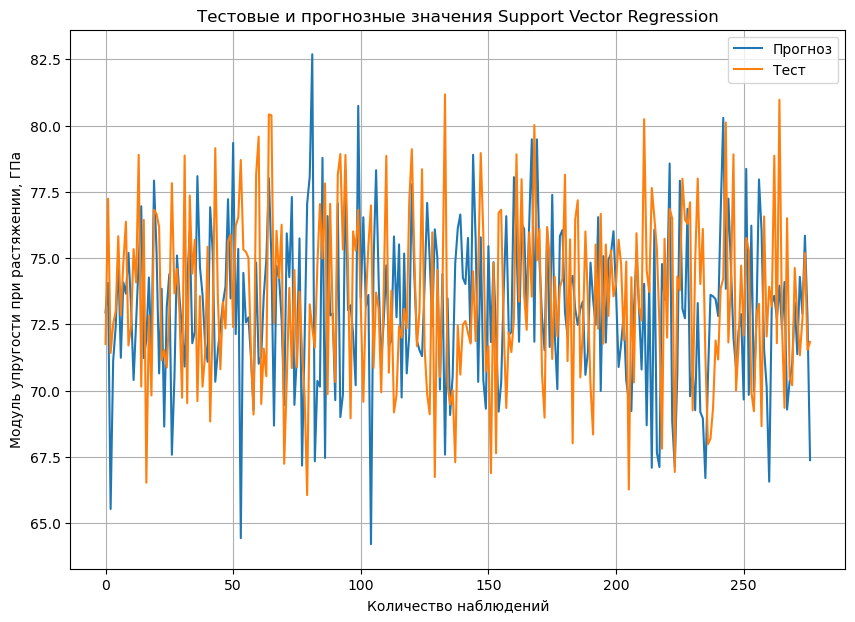

In [168]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.43
RF_MAE: 2.6124333460
RF_MAPE: 0.0354867262
Test score: -0.0356034507


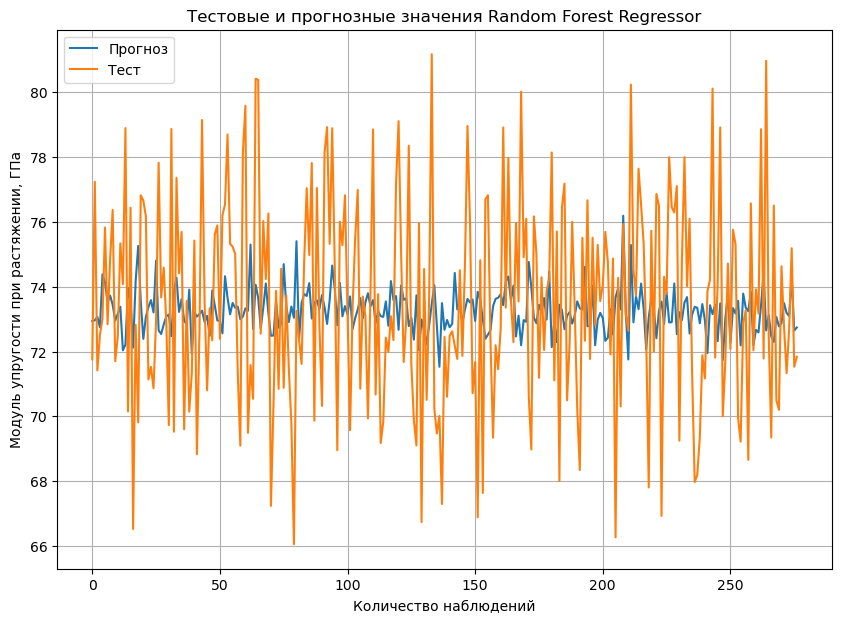

In [169]:
# Метод случайного леса
#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(rfr2.score(x_train_2, y_train_2)))
print('RF_MAE: {:.10f}'.format(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.10f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print("Test score: {:.10f}".format(rfr2.score(x_test_2, y_test_2))) 
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.015811537393697894238187018345
lr_MAE: 2.609340907723948443930339635699
lr_MAPE: 0.035423977215581416155831817605
Test score: -0.025030976977808094829924812075


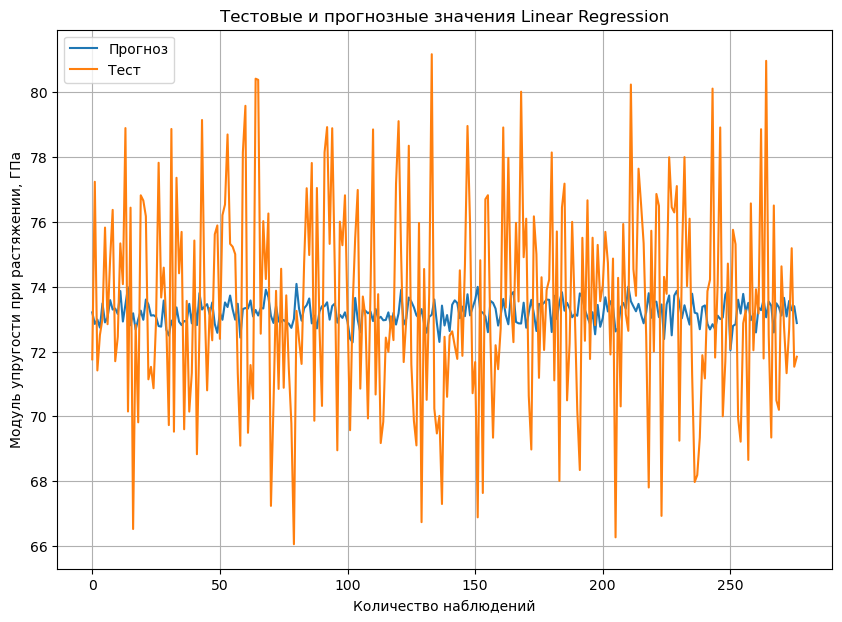

In [170]:
#Метод линейной регрессии
#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
print('Результат:')
print("Score: {:.30f}".format(lr2.score(x_train_2, y_train_2)))
print('lr_MAE: {:.30f}'.format(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.30f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print("Test score: {:.30f}".format(lr2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.52
GBR_MAE:  3
GBR_MAPE: 0.04
Test score: -0.12


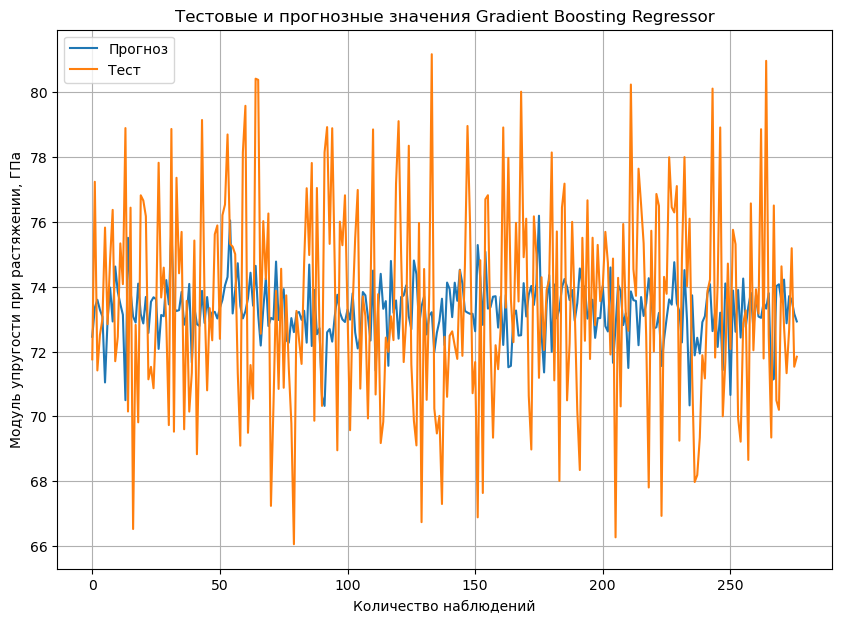

In [171]:
#Метод градиентного бустинга
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.16
KNN_MAE:  3
KNN_MAPE: 0.04
Test score: -0.17


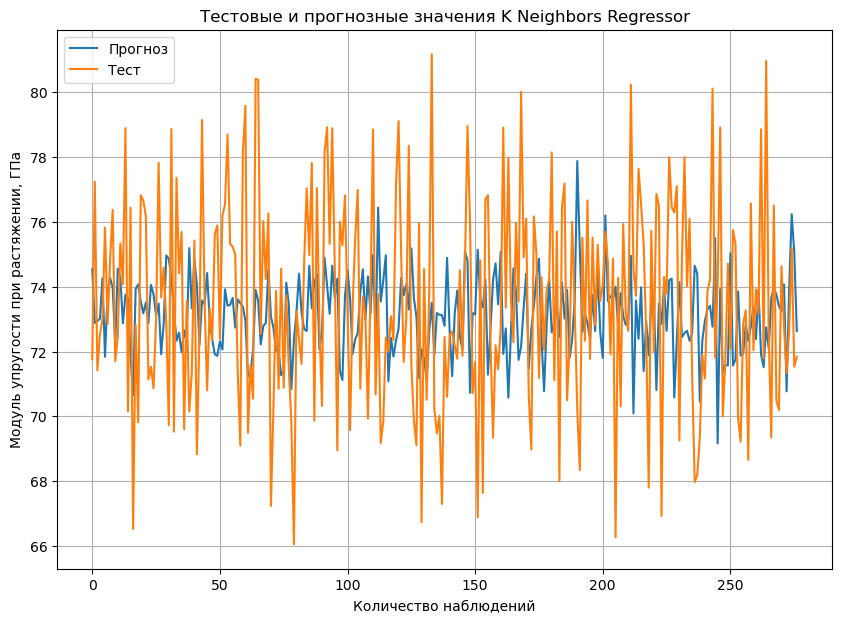

In [172]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knr2 = KNeighborsRegressor(n_neighbors=5)
knr2.fit(x_train_2, y_train_2)
y_pred_knn2 = knr2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
print('Результат:')
print("Score: {:.2f}".format(knr2.score(x_train_2, y_train_2)))
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print("Test score: {:.2f}".format(knr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат
Score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MAPE: 0.05
Test score: -1.20


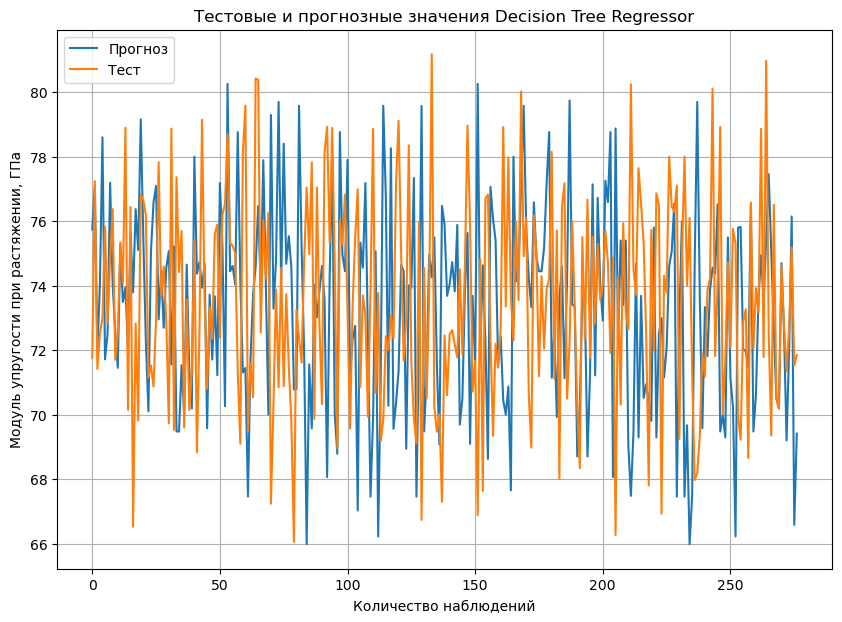

In [173]:
#Деревья решений - Decision Tree Regressor - 6

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
print('Результат')
print("Score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат
Score: 0.00
SGD_MAE:  3
SGD_MAPE: 0.04
Test score: -0.01


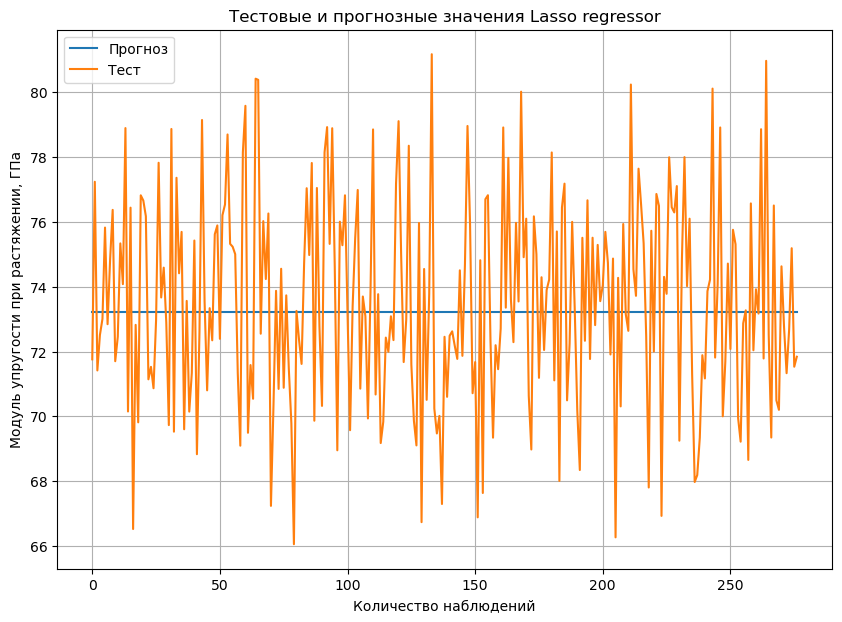

In [174]:
# Лассо регрессия - the Lasso - 9

clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
print('Результат')
print("Score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз")
plt.plot(y_test_2.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [175]:
y2_pred_svr=svr2.predict(x_train_2)
mae_svr_tr = mean_absolute_error(y2_pred_svr, y_train_2)

y2_pred_rfr=rfr2.predict(x_train_2)
mae_rfr_tr = mean_absolute_error(y2_pred_rfr, y_train_2)

y2_pred_lr=lr2.predict(x_train_2)
mae_lr_tr = mean_absolute_error(y2_pred_lr, y_train_2)

y2_pred_gbr=gbr2.predict(x_train_2)
mae_gbr_tr = mean_absolute_error(y2_pred_gbr, y_train_2)

y2_pred_knr=knr2.predict(x_train_2)
mae_knr_tr = mean_absolute_error(y2_pred_knr, y_train_2)

y2_pred_dtr=dtr2.predict(x_train_2)
mae_dtr_tr = mean_absolute_error(y2_pred_dtr, y_train_2)

y2_pred_clf=clf2.predict(x_train_2)
mae_clf_tr = mean_absolute_error(y2_pred_clf, y_train_2)

In [176]:
#сравним наши модели по метрике МАЕ
mae_df2 = {'Регрессор': ['Опорные вектора', 'Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи', 'Деревья решений',  'Лассо'],
'MAE_Test': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2,  mae_clf2],
'MAE_Train': [mae_svr_tr, mae_rfr_tr, mae_lr_tr, mae_gbr_tr, mae_knr_tr, mae_dtr_tr,  mae_clf_tr],
'MAE_Tr%T': [mae_svr_tr/mae_svr2, mae_rfr_tr/mae_rfr2, mae_lr_tr/mae_lr2, mae_gbr_tr/mae_gbr2, mae_knr_tr/mae_knr2, mae_dtr_tr/mae_dtr2, mae_clf_tr/mae_clf2]} 


mae_df2 = pd.DataFrame(mae_df2)
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid2 = GridSearchCV(estimator = rfr2, param_grid  = parametrs, cv=10)
grid2.fit(x_train_2, y_train_2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['mse'], 'max_depth': [9, 15],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [177]:
#Поиск гиперпараметров / поиск лучшей модели
mae_df2

Регрессор  MAE_Test  MAE_Train  MAE_Tr%T
0      Опорные вектора  3.447804   0.900531  0.261190
1        Случайный лес  2.612433   1.800005  0.689015
2   Линейная регрессия  2.609341   2.378976  0.911715
3  Градиентный бустинг  2.665167   1.639078  0.615000
4   К ближайшие соседи  2.773522   2.174922  0.784173
5      Деревья решений  3.669309   0.000000  0.000000
6                Лассо  2.580193   2.388992  0.925897

In [178]:
grid2.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 300}

In [179]:
#Выводим гиперпараметры для оптимальной модели
print(grid2.best_estimator_)
knr_u = grid2.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {knr_u.score(x_test_2, y_test_2).round(3)}')

RandomForestRegressor(criterion='mse', max_depth=9, n_estimators=300,
                      random_state=33)
R2-score RFR для модуля упругости при растяжении: -0.035


In [180]:
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=15, max_features='auto')
#Обучаем модель
rfr21_grid.fit(x_train_2, y_train_2)

predictions_rfr21_grid = rfr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

2.617798438588823

In [181]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 113, 'weights': 'uniform'}

In [182]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

KNeighborsRegressor(n_neighbors=113)
R2-score KNR для модуля упругости при растяжении: -0.037


In [183]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучаем модель
knn21_grid.fit(x_train_2, y_train_2)

predictions_knn21_grid = knn21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.7577808199083322

In [184]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid2 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr2, param_grid2, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 150,
 'min_samples_split': 250,
 'splitter': 'random'}

In [185]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(x_test_2, y_test_2).round(3)}')

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_leaf=150,
                      min_samples_split=250, splitter='random')
R2-score DTR для модуля упругости при растяжении: -0.017


In [186]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=100, min_samples_split=250)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.6148420213878336

In [187]:
dtr2_grid=dtr21_grid.predict(x_train_2)
mae2_dtr_grid = mean_absolute_error(dtr2_grid, y_train_2)

knn2_grid=knn21_grid.predict(x_train_2)
mae2_knn_grid = mean_absolute_error(knn2_grid, y_train_2)

rfr2_grid=rfr21_grid.predict(x_train_2)
mae2_rfr_grid = mean_absolute_error(rfr2_grid, y_train_2)

new_row_in_mae = {'Регрессор': 'Деревья решений_Grid',
'MAE_Test': mae_dtr21_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_dtr_grid/mae_dtr21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index = True)

new_row_in_mae = {'Регрессор': 'К ближайшие соседи_Grid',
'MAE_Test': mae_knn21_grid,
'MAE_Train': mae2_dtr_grid,
'MAE_Tr%T': mae2_knn_grid/mae_knn21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index=True)

new_row_in_mae = {'Регрессор': 'Случайный лес_Grid',
'MAE_Test': mae_rfr21_grid,
'MAE_Train': mae2_rfr_grid,
'MAE_Tr%T': mae2_rfr_grid/mae_dtr21_grid} 
mae_df2 = mae_df2.append(new_row_in_mae, ignore_index=True)

mae_df2

Регрессор  MAE_Test  MAE_Train      MAE_Tr%T
0          Опорные вектора  3.447804   0.900531  2.611897e-01
1            Случайный лес  2.612433   1.800005  6.890146e-01
2       Линейная регрессия  2.609341   2.378976  9.117154e-01
3      Градиентный бустинг  2.665167   1.639078  6.150003e-01
4       К ближайшие соседи  2.773522   2.174922  7.841733e-01
5          Деревья решений  3.669309   0.000000  0.000000e+00
6                    Лассо  2.580193   2.388992  9.258967e-01
7     Деревья решений_Grid  2.614842   2.377249  9.091366e-01
8  К ближайшие соседи_Grid  2.757781   2.377249  3.782777e-07
9       Случайный лес_Grid  2.617798   1.029354  3.936582e-01

In [188]:
mae_df2['MAE_Tr%T'] = roundplaces = np.round(mae_df2['MAE_Tr%T'], decimals = 6)
mae_df2['MAE_Train'] = roundplaces = np.round(mae_df2['MAE_Train'], decimals = 6) 
mae_df2['MAE_Test'] = roundplaces = np.round(mae_df2['MAE_Test'], decimals = 6)  
mae_df2 

Регрессор  MAE_Test  MAE_Train  MAE_Tr%T
0          Опорные вектора  3.447804   0.900531  0.261190
1            Случайный лес  2.612433   1.800005  0.689015
2       Линейная регрессия  2.609341   2.378976  0.911715
3      Градиентный бустинг  2.665167   1.639078  0.615000
4       К ближайшие соседи  2.773522   2.174922  0.784173
5          Деревья решений  3.669309   0.000000  0.000000
6                    Лассо  2.580193   2.388992  0.925897
7     Деревья решений_Grid  2.614842   2.377249  0.909137
8  К ближайшие соседи_Grid  2.757781   2.377249  0.000000
9       Случайный лес_Grid  2.617798   1.029354  0.393658

In [189]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': SVR(C=1, gamma=1), 'regressor__C': 1, 'regressor__gamma': 1}

Наилучшее значение правильности перекрестной проверки: -0.00
Правильность на тестовом наборе: -0.01
Наилучшая модель:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor', SVR(C=1, gamma=1))])


In [ ]:
!pip install daal==2021.4.0
!pip install numpy==1.22
!pip uninstall tensorflow tensorflow-intel
!pip install tensorflow tensorflow-intel
import tensorflow as tf

  Using cached daal-2021.4.0-py2.py3-none-win_amd64.whl (69.0 MB)
  Using cached tbb-2021.9.0-py3-none-win_amd64.whl (283 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
#Сформируем входы и выход для модели
tv = DataF1['Соотношение матрица-наполнитель']
tr_v = DataF1.loc[:, DataF1.columns != 'Соотношение матрица-наполнитель']

#Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

#Нормализуем данные
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))